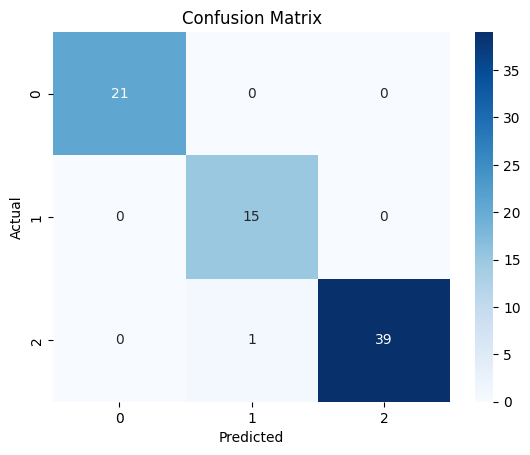

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        21
           D       0.94      1.00      0.97        15
           H       1.00      0.97      0.99        40

    accuracy                           0.99        76
   macro avg       0.98      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib


epl_data = pd.read_csv('epl_results.csv')

label_encoder_home = LabelEncoder()
label_encoder_away = LabelEncoder()
epl_data['HomeTeam_encoded'] = label_encoder_home.fit_transform(epl_data['HomeTeam'])
epl_data["AwayTeam_encoded"] = label_encoder_away.fit_transform(epl_data['AwayTeam'])


label_encoder_ftr = LabelEncoder()
label_encoder_htr = LabelEncoder()
epl_data['FTR_encoded'] = label_encoder_ftr.fit_transform(epl_data['FTR'])
epl_data['HTR_encoded'] = label_encoder_htr.fit_transform(epl_data['HTR'])



X = epl_data.drop(columns=["FTR", "Date", "Referee", "Time", "HTR"])
X = X[["HomeTeam_encoded", "AwayTeam_encoded", "FTHG", "FTAG", "HTHG", "HTAG", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR"]]
y = epl_data[["FTR_encoded"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score


# joblib.dump(model, 'epl_decision_tree_model.pkl')
# joblib.dump(label_encoder_home, 'label_encoder_home.pkl')
# joblib.dump(label_encoder_away, 'label_encoder_away.pkl')
# joblib.dump(label_encoder_ftr, 'label_encoder_ftr.pkl')
# joblib.dump(label_encoder_htr, 'label_encoder_htr.pkl')
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, predictions, target_names=label_encoder_ftr.classes_)
print(report)

